In [41]:
%matplotlib inline
import pylab as p
import numpy as np
import fsps

## Note: I just realized that I could've done all the math here instead of on Mathematica (out of habit), so sorry for not having that shown. :(

### Problem 1: UV Star Formation Rates

We wish to derive a relationship between the star formation rate and the FUV luminosity
\begin{align}
\log\dot{M_*}=\log L_{\rm FUV}-\log C_{\rm FUV}
\end{align}

where $C_{\rm FUV}$ is some as-yet undetermined constant. We run FSPS, assuming a constant star formation history, a Kroupa IMF, and solar metallicity.

In [44]:
sp = fsps.StellarPopulation(compute_vega_mags=False,sfh=1,const=1.0)
sp.params['sfh'] = 1
sp.params['const'] = 1.0
#sp.params['tage'] = 13.7

We are interested in the GALEX-FUV filter, and so we use that value to infer the star formation rate. Note that FSPS gives answers in terms of the AB-magnitude system, so we have to convert this to get a luminosity $L_{\rm FUV}$. An AB-Magnitude is defined as
\begin{align}
M_{\rm AB}=-2.5\log_{10}F_\nu - 48.6
\end{align}

The specific luminosity in terms of the specific flux is
\begin{align}
F_\nu = \frac{L_\nu}{4\pi r^2}
\end{align}

where $r=10$ pc. We are interested in the total FUV luminosity rather than the FUV luminosity, so we need to solve for
\begin{align}
L_{\rm FUV}=\nu L_\nu
\end{align}

where $\nu$ is the effective GALEX FUV frequency. The all-powerful and all-knowing internet provides us with the effective wavelength

\begin{align}
\lambda_{\rm eff} = 153.9\,\,{\rm nm}
\end{align}

Backtracking everything, we finally find

\begin{align}
L_{\rm FUV} = 4\pi r^2 \frac{c}{\lambda}\,{\rm pow}(-(M_{\rm AB}+48.6)/2.5,10)
\end{align}

FSPS tells us that at present-day, assuming constant SFH, the GALEX FUV filter gives
\begin{align}
M_{\rm AB} = 6.2
\end{align}

So we get a luminosity

\begin{align}
\log_{10}L_{\rm FUV} = 33.4
\end{align}
I found an FSPS SFR of
\begin{align}
\log_{10}\dot{M}_*=-10.1
\end{align}

And so

\begin{align}
\log_{10}C_{\rm FUV} &= \log_{10}L_{\rm FUV}-\log_{10}\dot{M}_* \\
&= 43.5
\end{align}

In [11]:
mag = sp.get_mags(tage=13.7,bands=fsps.find_filter('galex_fuv'))
sfr = sp.sfr
mag,sfr

(array([ 6.2191321]), 7.2992700729927016e-11)

Kennicutt & Evans (2012) found that $\log_{10}C_{\rm FUV}=43.35$, which is only slightly different than what I had found. Since this is of order a few percent, I can only speculate what some of the differences would be caused by. Observations apply a dust-correction, so maybe this is where the (small) discrepancy comes from.

### Problem 2: Stellar Mass


In [16]:
mag_b = sp.get_mags(tage=13.7,bands=['b'])
mass = sp.stellar_mass

mag_b, mass

(array([ 5.3391398]), 0.60398341295900082)

### Problem 3: Metallicity

First we need to find the absolute B-band magnitudes $M_B$ from the galaxy sample. So we need to solve for the distance modulus
\begin{align}
\mu = -5(\log_{10}d-1)
\end{align}

In [45]:
dist = np.loadtxt("galaxies.dat",skiprows=1,usecols=[7]) #in Mpc
mag_b = np.loadtxt("galaxies.dat",skiprows=1,usecols=[8]) #apparent B

In [46]:
dist_modulus = -5.*np.log10(dist*1e6)+5
abs_b = mag_b + dist_modulus

Next, we can use Eq. (8) from Berg et al. (2012) to find the metallicity

\begin{align}
12+\log(O/H) = (6.59\pm0.32)+(-0.08\pm0.03)M_B
\end{align}

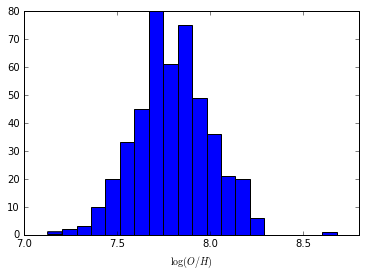

In [52]:
z_oh = 6.59-0.08*abs_b

p.hist(z_oh,bins=20)
p.xlabel(r'$\log(O/H)$')
p.show()

### Problem 4: Trends in SFR, Mass, and Metallicity

In [84]:
mass = 4.-abs_b/3.

In [85]:
fuv = np.loadtxt("galaxies.dat",skiprows=1,usecols=[11])
fuv_err = np.loadtxt("galaxies.dat",skiprows=1,usecols=[12])
nonzero = np.where(fuv!=99.99)
fuv = fuv[nonzero]
fuv_err = fuv_err[nonzero]

fuv_lum = np.log10(4*np.pi*(10*3e18)**2*3e10/(153.9e-7)*10**(-(fuv+48.6)/2.5))
sfr = fuv_lum-43.5

mass_nonzero = mass[nonzero]

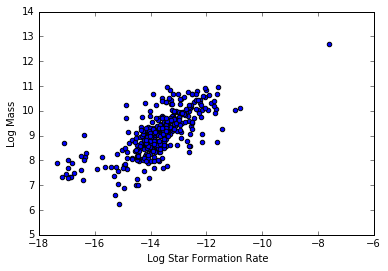

In [89]:
p.scatter(sfr,mass_nonzero)
p.xlabel(" Log Star Formation Rate")
p.ylabel("Log Mass")